## PCA (Part 1)

CPSC 340: Machine Learning and Data Mining

The University of British Columbia

2018 Winter Term 1

By Mike Gelbart (converted to Julia by Jason Chau)

In [16]:
using PyCall, PyPlot, Statistics
plt = pyimport("matplotlib.pyplot")
SkDecomposition = pyimport("sklearn.decomposition")
using PyPlot
using LinearAlgebra

Create a synthetic data set

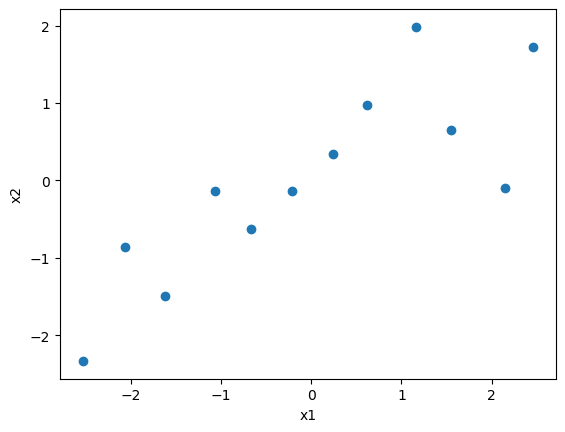

In [2]:
n = 12
d = 2

x1 = range(0,stop=5,length=n) + randn(n)*0.05
x2 = x1.*0.7 + randn(n).*0.5
x1 = x1.-Statistics.mean(x1)
x2 = x2.-Statistics.mean(x2)

X = hcat(x1,x2)

plt.scatter(x1,x2)
plt.xlabel("x1")
plt.ylabel("x2");

Run PCA with k=1

In [3]:
k = 1
pca = SkDecomposition.PCA(n_components=k)
pca.fit(X);

### Visualizing PCA

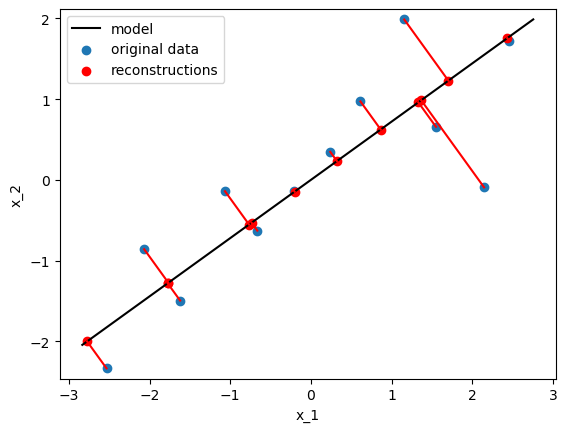

PyObject <matplotlib.legend.Legend object at 0x0000000032B3FA90>

In [4]:
function make_plot(pca, X)
    W = pca.components_
    Z = pca.transform(X)

    # visualize the subspace spanned by W
    grid = range(minimum(X[:,1])-0.3,stop=maximum(X[:,1])+0.3,length=1000)
    gridplot = (grid.-pca.mean_[1])/W[1,1]*W[1,2].+pca.mean_[2]

    # visualize the reconstructions
    Xhat = pca.inverse_transform(Z)
    # xhat = Z@W + pca.mean_ # the same

    plt.scatter(X[:,1],X[:,2], label="original data")
    plt.xlabel("x_1")
    plt.ylabel("x_2");
    plt.plot(grid, gridplot, "black", label="model")
    plt.scatter(Xhat[:,1],Xhat[:,2], c="red", label="reconstructions")
    plt.axis("equal");
    
    for i in 1:size(X)[1]
        plt.plot((X[i,1],Xhat[i,1]),(X[i,2],Xhat[i,2]), "red")
    end
    
    plt.legend()
end
    
make_plot(pca, X)

The line gives us a new, 1D coordinate system.

#### Moving to $d=3,k=2$

In [5]:
n = 12
d = 3

x1 = range(0,stop=5,length=n) + randn(n).*0.05
x2 = -x1.*0.1 + randn(n).*2
x3 = x1.*0.7 + randn(n).*3

X = hcat(x1,x2,x3)
X = X .- [Statistics.mean(X[:,i]) for i in 1:size(X)[2]]';

Let's look at the points.

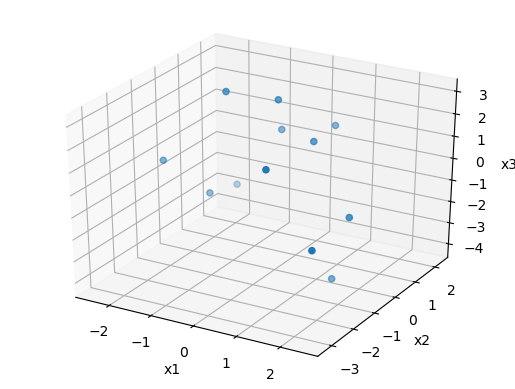

PyObject Text(0.09109821416582614, 0.01220484645882519, 'x3')

In [6]:
pygui(true)
p = PyPlot.scatter3D(X[:,1],X[:,2],X[:,3])
xlabel("x1")
ylabel("x2")
zlabel("x3")

Let's look at what PCA gives us

In [12]:
pygui(true)
# fit PCA
pca = SkDecomposition.PCA(n_components=2)
pca.fit(X)

# get grid for visualizing plane
z1 = range(-7,stop=7,length=10)
z2 = range(-7,stop=7,length=10)
z1grid = repeat(z1',10,1)
z2grid = repeat(z2,1,10)
Zgrid = hcat(z1grid'[:],z2grid'[:])
Xgrid = pca.inverse_transform(Zgrid)
Xgrid_re = reshape(Xgrid, 10,10,3)

# get reconstructions of original points
Z = pca.transform(X)
Xhat = pca.inverse_transform(Z)

for i in 1:n
    PyPlot.plot3D((X[i,1],Xhat[i,1]),
                    (X[i,2],Xhat[i,2]),
                    (X[i,3],Xhat[i,3]),
                    color="blue")
end
PyPlot.scatter3D(X[:,1],X[:,2],X[:,3],color="blue")
PyPlot.scatter3D(Xhat[:,1],Xhat[:,2],Xhat[:,3],color="purple")
PyPlot.plot_surface(Xgrid_re[:,:,1],Xgrid_re[:,:,2],Xgrid_re[:,:,3],color="g",alpha=0.5)


xlabel("x1")
ylabel("x2")
zlabel("x3")

PyObject Text(0.09113564449804984, 0.012209861172471081, 'x3')

We can also make a scatter plot of these $Z$-values:

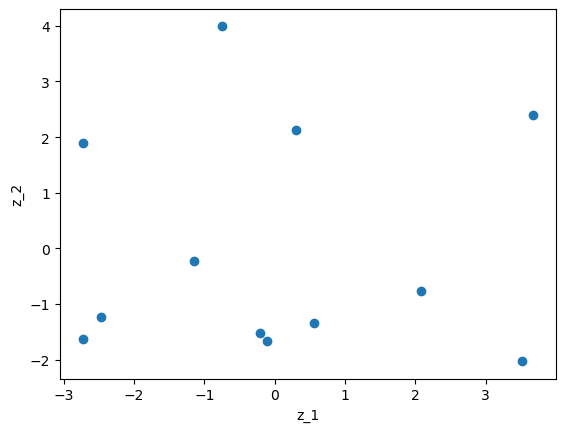

In [10]:
pygui(false)
plt.scatter(Z[:,1],Z[:,2])
plt.xlabel("z_1")
plt.ylabel("z_2");

Above: this is projecting and rotating the data.

$d=3,k=1$

In [13]:
pygui(true)
n = 12
d = 3

x1 = range(0,stop=5,length=n)  + randn(n)*0.05
x2 = -x1.*0.1 + randn(n).*2
x3 = x1.*0.7 + randn(n).*1.5

X = hcat(x1,x2,x3)
X = X.-[Statistics.mean(X[:,i]) for i in 1:size(X)[2]]'

# fit PCA
pca = SkDecomposition.PCA(n_components=1)
pca.fit(X)

# get grid for visualizing plane
Zgrid = reshape(range(-7,stop=7,length=100),100,1)
Xgrid = pca.inverse_transform(Zgrid)

# get reconstructions of original points
Xhat = pca.inverse_transform(pca.transform(X))

for i in 1:n
    PyPlot.plot3D((X[i,1],Xhat[i,1]), 
                    (X[i,2],Xhat[i,2]), 
                    (X[i,3],Xhat[i,3]),
                    color="blue")
end
PyPlot.plot3D(Xgrid[:,1],Xgrid[:,2],Xgrid[:,3],color="black")

PyPlot.scatter3D(Xhat[:,1], Xhat[:,2], Xhat[:,3],color="purple")

PyPlot.scatter3D(X[:,1], X[:,2], X[:,3],color="blue")

PyObject <mpl_toolkits.mplot3d.art3d.Path3DCollection object at 0x00000000022EF208>

### Inspecting the values

In [87]:
k = 1
pca = SkDecomposition.PCA(n_components=k)
pca.fit(X);

In [88]:
X

12×3 Array{Float64,2}:
 -2.54405    1.36684    -1.77997 
 -2.01072   -1.17758    -1.6467  
 -1.5881     0.38777    -0.990278
 -1.06855   -0.211153   -2.18929 
 -0.75367   -0.947349    0.729205
 -0.196069   1.93066    -0.777257
  0.318893  -0.345653    1.65795 
  0.606889  -1.74889    -1.90289 
  1.06283    0.575541    2.72211 
  1.67985    0.0633328   0.96964 
  1.97405   -1.78406     2.17391 
  2.51865    1.89054     1.03357 

In [91]:
Z = pca.transform(X)
Z

12×1 Array{Float64,2}:
  3.0452099292442005 
  2.5602725966197317 
  1.807053771858783  
  2.333531482892965  
 -0.03798736881432807
  0.7253537978811908 
 -1.4410838745414303 
  0.9743696685274146 
 -2.718620148732364  
 -1.8491739830310623 
 -2.954721546880222  
 -2.444204325024879  

In [92]:
W = pca.components_
W

1×3 Array{Float64,2}:
 -0.67574  0.0103443  -0.737067

In [94]:
size(X)

(12, 3)

In [100]:
length(Z)+length(W)

15

We sometimes call this "compression" because we've reduced the number of values we're storing ($15<36$).

In [101]:
Xhat = pca.inverse_transform(Z)
Xhat

12×3 Array{Float64,2}:
 -2.05777     0.0315006    -2.24452  
 -1.73008     0.0264843    -1.88709  
 -1.2211      0.0186927    -1.33192  
 -1.57686     0.0241388    -1.71997  
  0.0256696  -0.000392953   0.0279992
 -0.490151    0.00750328   -0.534635 
  0.973798   -0.014907      1.06218  
 -0.658421    0.0100792    -0.718176 
  1.83708    -0.0281222     2.00381  
  1.24956    -0.0191284     1.36297  
  1.99662    -0.0305646     2.17783  
  1.65165    -0.0252836     1.80154  

### Why you need to center the data

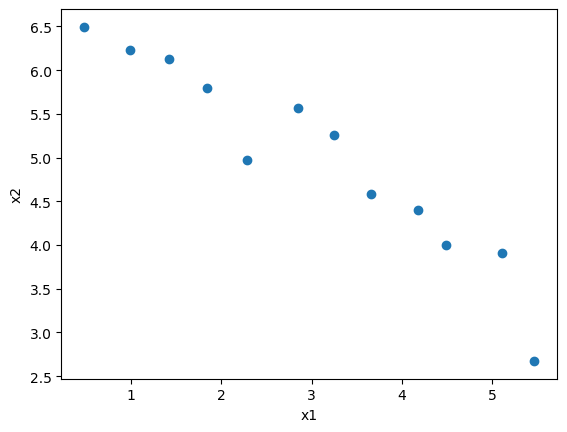

In [58]:
pygui(false)
n = 12
d = 2

x1 = range(0,stop=5,length=n)  + randn(n).*0.05
x2 = x1.*(-0.7) + randn(n).*0.5
x1 = x1.-Statistics.mean(x1).+3
x2 = x2.-Statistics.mean(x2).+5

X = hcat(x1,x2)

plt.scatter(x1,x2)
plt.xlabel("x1")
plt.ylabel("x2");

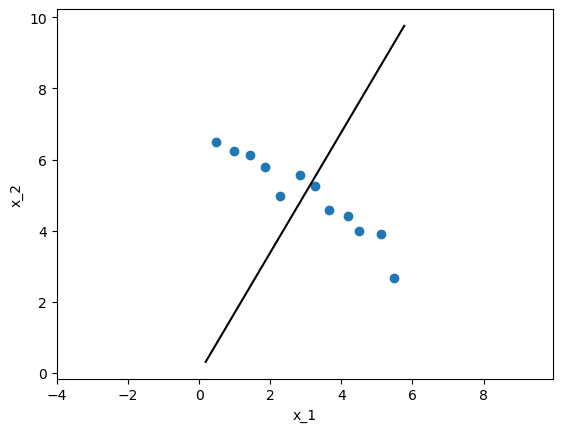

In [59]:
pygui(false)
# mu=np.mean(X,axis=0)
# X -= mu

F = svd(X)
W = F.Vt[1,:]'

Z = X*W'

# visualize the subspace spanned by W
grid = range(minimum(X[:,1])-0.3,stop=maximum(X[:,1])+0.3,length=1000)
gridplot = (grid.-pca.mean_[1])/W[1,1]*W[1,2].+pca.mean_[2]

# visualize the reconstructions
Xhat = Z*W
# xhat = Z@W + pca.mean_ # the same

plt.scatter(X[:,1],X[:,2], label="original data")
plt.xlabel("x_1")
plt.ylabel("x_2");
plt.plot(grid, gridplot, "black", label="model")
plt.axis("equal");

In [61]:
mu = [mean(X[:,i]) for i in 1:size(X)[2]]'
X_centred = X .- mu;

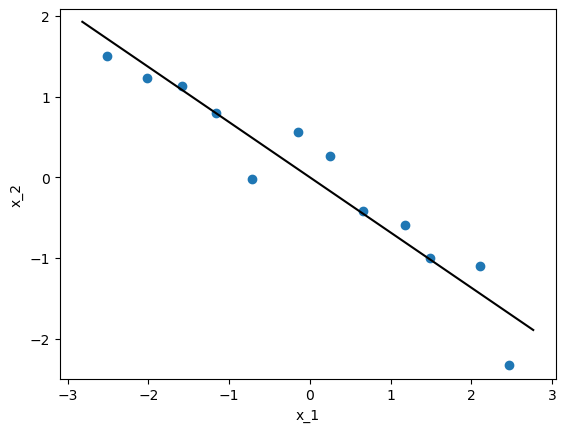

In [62]:
F = svd(X_centred)
W = F.Vt[1,:]'
Z = X_centred*W'
Xhat = Z*W

grid = range(minimum(X_centred[:,1]).-0.3,stop=maximum(X_centred[:,1])+0.3,length=1000)
gridplot = (grid.-pca.mean_[1])./W[1,1]*W[1,2]

plt.scatter(X_centred[:,1],X_centred[:,2], label="original data")
plt.xlabel("x_1")
plt.ylabel("x_2");
plt.plot(grid, gridplot, "black", label="model")
plt.axis("equal");

Above: with centering, things look much better.